#**Implemented By Muhammad Hanan Asghar**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 77 bytes


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba

 99% 1.31G/1.32G [00:11<00:00, 149MB/s]
100% 1.32G/1.32G [00:11<00:00, 121MB/s]


In [ ]:
!cp -v -r '/content/gender-recognition-200k-images-celeba.zip' '/content/drive/MyDrive'

'/content/gender-recognition-200k-images-celeba.zip' -> '/content/drive/MyDrive/gender-recognition-200k-images-celeba.zip'


In [ ]:
!unzip '/content/drive/MyDrive/gender-recognition-200k-images-celeba.zip'

In [56]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
TRAIN_DIR = '/content/Dataset/Train'
VALIDATION_DIR = '/content/Dataset/Validation'

In [21]:

import os
os.listdir(TRAIN_DIR+"/"+"Male/")[568]

'021712.jpg'

In [22]:
import cv2
img = cv2.imread(TRAIN_DIR+"/Male"+"/021712.jpg")

In [23]:
img.shape

(218, 178, 3)

In [133]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(250, 250),
        batch_size=32,
        color_mode="rgb",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(250, 250),
        batch_size=32,
        color_mode="rgb",
        class_mode='categorical')

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [134]:
kernel_s = (3, 3)

In [135]:


model=Sequential()
model.add(Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=l1(0.001),padding="VALID"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 27, 27, 128)     

In [136]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 27, 27, 128)     

In [137]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [138]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5000,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=706,
    callbacks=callbacks
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5000/5000 [==============================] - 398s 79ms/step - loss: 0.4799 - accuracy: 0.7361 - val_loss: 0.1402 - val_accuracy: 0.9451

Epoch 00001: val_loss improved from inf to 0.14022, saving model to model.h5
Epoch 2/10
5000/5000 [==============================] - 395s 79ms/step - loss: 0.1270 - accuracy: 0.9521 - val_loss: 0.1043 - val_accuracy: 0.9630

Epoch 00002: val_loss improved from 0.14022 to 0.10434, saving model to model.h5
Epoch 3/10
5000/5000 [==============================] - 392s 78ms/step - loss: 0.1017 - accuracy: 0.9633 - val_loss: 0.0935 - val_accuracy: 0.9664

Epoch 00003: val_loss improved from 0.10434 to 0.09348, saving model to model.h5
Epoch 4/10
5000/5000 [==============================] - 391s 78ms/step - loss: 0.0906 - accuracy: 0.9678 - val_loss: 0.0881 - val_accuracy: 0.9684

Epoch 00004: val_loss improved from 0.09348 to 0.08813, saving model to model.h5
Epoch 5/10
5000/5000 [==============================] - 391s 78ms/step - loss: 0.0805 - 

In [143]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [145]:
model.save("gender_model")

INFO:tensorflow:Assets written to: gender_model/assets


INFO:tensorflow:Assets written to: gender_model/assets


In [140]:
from keras.models import load_model

cnn = load_model("gender_model.h5")

In [141]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/photo.png', target_size=(250,250))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [142]:
result

array([[0., 1.]], dtype=float32)

In [114]:
round(float(result[0]))

1

In [82]:
import matplotlib.pyplot as plt

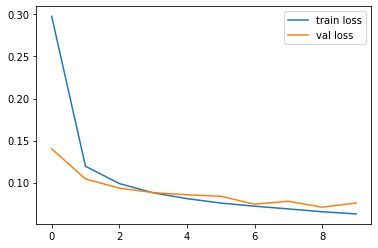

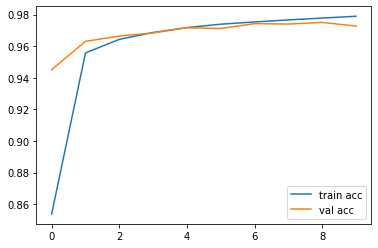

In [144]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [198]:
data = os.listdir("/content/Dataset/Test/Female/")

In [199]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/Dataset/Test/Female/"+data[1234], target_size=(250,250))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [200]:
result

array([[1.0000000e+00, 2.2152802e-24]], dtype=float32)